# **Predictive ML Project**

Author: Sydney Sailors

GitHub project repository: [Data-fun-o7-ml](https://github.com/sydsailors/datfun-07-ml)

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

## Part 1 - Chart a Straight Line

Guided Project from chapter 10.16

In [2]:
%matplotlib inline
c = lambda f: 5 / 9 * (f - 32)

In [3]:
temps = [(f, c(f)) for f in range(0, 101, 10)]

In [5]:
temps_df = pd.DataFrame(temps, columns=['Farenheit', 'Celsius'])

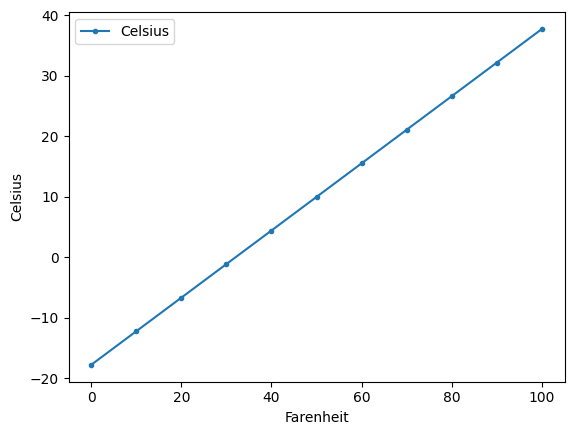

In [6]:
axes = temps_df.plot(x='Farenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquisition

In [7]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [8]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [9]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [10]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

In [11]:
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [12]:
nyc_df.Date.dtype

dtype('int64')

In [13]:
nyc_df.Date = nyc_df.Date.floordiv(100)

In [14]:
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [15]:
pd.set_option('display.precision', 2)

In [16]:
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [17]:
linear_regression = stats.linregress(x=nyc_df.Date,
                                     y=nyc_df.Temperature)

In [18]:
linear_regression.slope

np.float64(0.014771361132966163)

In [19]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict

In [20]:
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

### Section 7 - Visualizations

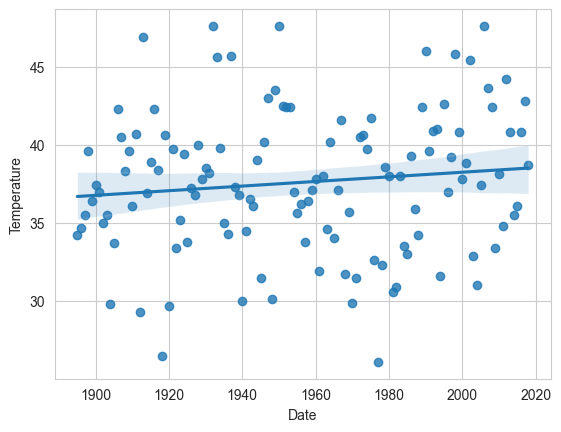

In [21]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)

## Part 3 - Prediction

### Section 1 - Build the Model

Guided project from chapter 15.4

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values,
    random_state=11)

In [23]:
X_train.shape

(93, 1)

In [24]:
X_test.shape

(31, 1)

In [25]:
linear_regression = LinearRegression()

In [26]:
linear_regression.fit(X=X_train, y=y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
linear_regression.coef_

array([0.01939167])

In [28]:
linear_regression.intercept_

np.float64(-0.30779820252656265)

### Section 2 - Test the Model

In [29]:
predicted = linear_regression.predict(X_test)
expected = y_test

In [30]:
for p, e in zip(predicted[::5], expected[::5]):
                print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

In [31]:
predict = (lambda x: linear_regression.coef_ * x + 
                     linear_regression.intercept_)

In [32]:
predict(2024)

array([38.94094855])

### Section 4 - Visualizations